###  print out structures

In [13]:
import random
import numpy as np
import pprint
from graphviz import Digraph

from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot, draw_nn, print_my_params

np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)

#### Multi Layer Perceptron 1-2-1

In [14]:
# initialize a model
nin = 1  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

model = MLP(
    nin, [3, 4, nout], lastReLU=False, weightsinit=2, debug_bw=False
)  # 1-layer neural network
# print("parameters")
# pp.pprint(model.parameters())
# print_my_params(model)
print("layers")
pp.pprint(model.layers)
print(model.layers[0].layernumber)

xinumbers = list(range(1, 1 + nin))
xinput = [Value(x, type="i%s" % index) for index, x in enumerate(xinumbers, start=1)]
print("inputs")
pp.pprint(xinput)

activation = model(xinput)
# activation.backward()
print("activation", activation)

Module nn MLP: structure
[1, 3, 4, 1]
3
layers
[   Layer of [LinearNeuron(1), LinearNeuron(1), LinearNeuron(1)],
    Layer of [LinearNeuron(3), LinearNeuron(3), LinearNeuron(3), LinearNeuron(3)],
    Layer of [LinearNeuron(4)]]
L1
inputs
[   Value(name=v028,layernumber=,neuronnumber=,weightnumber=,type=i1,data=1, grad=0)]
activation Value(name=v066,layernumber=O,neuronnumber=N1,weightnumber=,type=a,data=3.4320000000000013, grad=0)


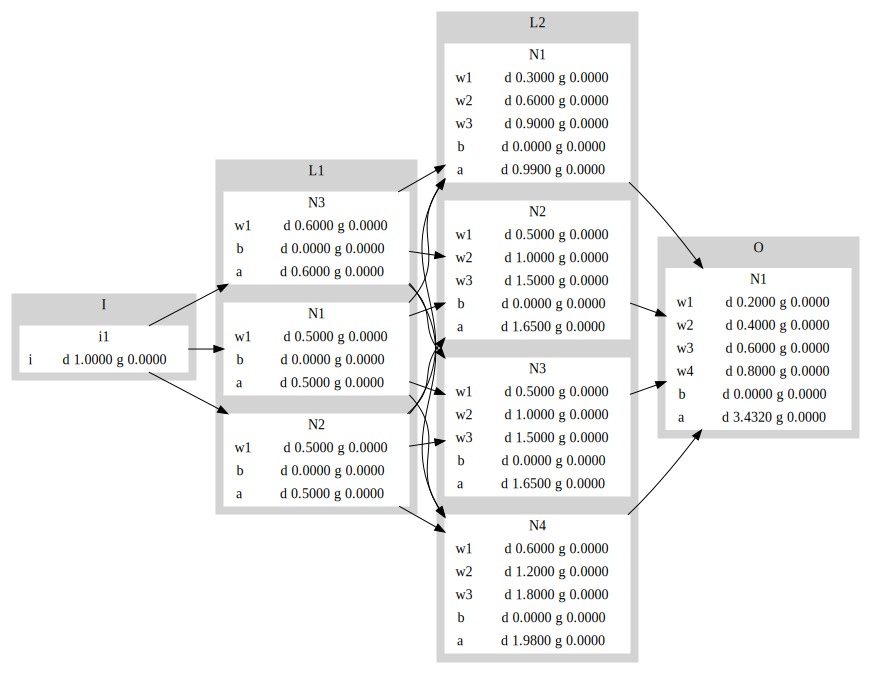

In [15]:
draw_nn(xinput, model)

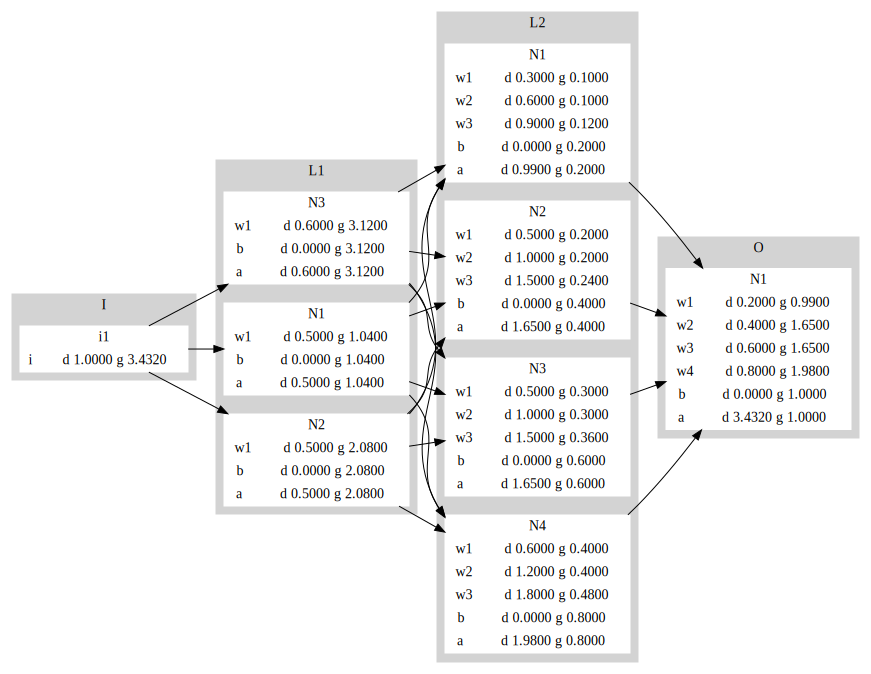

In [16]:
activation.backward()
draw_nn(xinput, model)

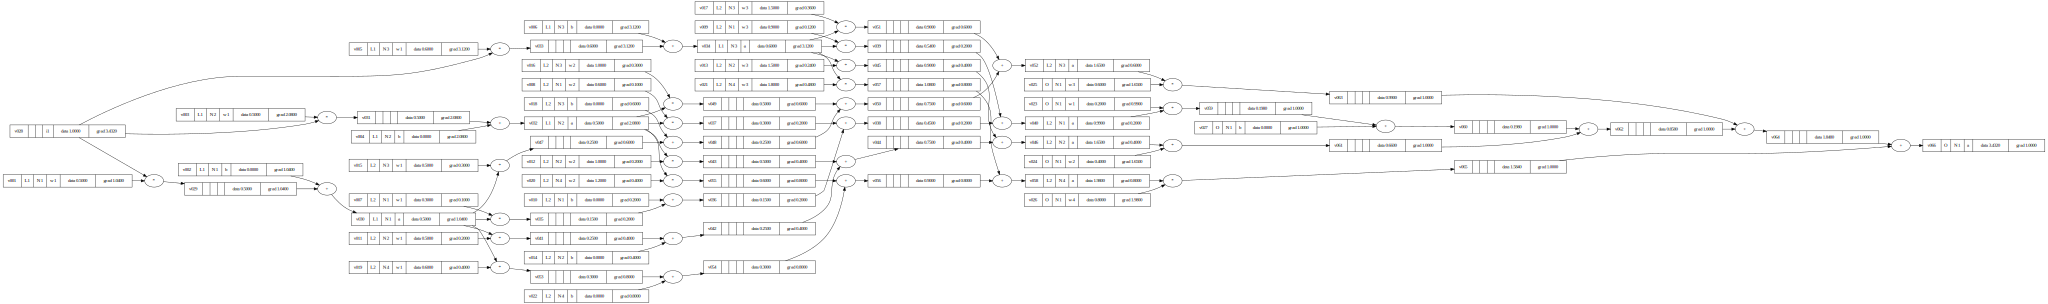

In [17]:
draw_dot(activation)

In [18]:
print(draw_dot(activation))

digraph {
	graph [rankdir=LR]
	140029624870912 [label="{ v063 | | | | data 0.9900 | grad 1.0000 }" shape=record]
	"140029624870912*" [label="*"]
	"140029624870912*" -> 140029624870912
	140029624872976 [label="{ v023 |O |N1 |w1 | data 0.2000 | grad 0.9900 }" shape=record]
	140029624866928 [label="{ v059 | | | | data 0.1980 | grad 1.0000 }" shape=record]
	"140029624866928*" [label="*"]
	"140029624866928*" -> 140029624866928
	140029624873120 [label="{ v032 |L1 |N2 |a | data 0.5000 | grad 2.0800 }" shape=record]
	"140029624873120+" [label="+"]
	"140029624873120+" -> 140029624873120
	140029624871104 [label="{ v064 | | | | data 1.8480 | grad 1.0000 }" shape=record]
	"140029624871104+" [label="+"]
	"140029624871104+" -> 140029624871104
	140029624873168 [label="{ v021 |L2 |N4 |w3 | data 1.8000 | grad 0.4800 }" shape=record]
	140029624865008 [label="{ v055 | | | | data 0.6000 | grad 0.8000 }" shape=record]
	"140029624865008*" [label="*"]
	"140029624865008*" -> 140029624865008
	140029624873216 [